In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import numpy as np

In [42]:
import pandas as pd
order = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/0gjkvLLgNdQLqG10jo5yyJyjK/orders_dimen.csv')
order['Order_Date'] = pd.to_datetime(order['Order_Date'])

order['day'] = pd.DatetimeIndex(order['Order_Date']).day

print(order.head(10))

   Order_ID Order_Date Order_Priority  Ord_id  day
0         3 2010-10-13            LOW   Ord_1   13
1       293 2012-01-10           HIGH   Ord_2   10
2       483 2011-10-07           HIGH   Ord_3    7
3       515 2010-08-28  NOT SPECIFIED   Ord_4   28
4       613 2011-06-17           HIGH   Ord_5   17
5       643 2011-03-24           HIGH   Ord_6   24
6       678 2010-02-26            LOW   Ord_7   26
7       807 2010-11-23         MEDIUM   Ord_8   23
8       868 2012-08-06  NOT SPECIFIED   Ord_9    6
9       933 2012-04-08  NOT SPECIFIED  Ord_10    8


In [27]:
odi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/odi-batting.csv')
odi['strike_rate'] = odi['Runs']/(odi['Balls']/100)
odi['isCentury'] = np.where(odi['Runs'] >= 100, 1 , 0)
odi[odi['isCentury'] == 1].sort_values(by= 'strike_rate', ascending = False)

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls,strike_rate,isCentury
28157,Pakistan,Shahid Afridi,102,04-10-1996,Fri,Gymkhana Club Ground,Sri Lanka,40,255.000000,1
28158,Pakistan,Shahid Afridi,102,15-04-2005,Fri,Green Park,India,46,221.739130,1
34446,South Africa,Mark V Boucher,147,20-09-2006,Wed,Senwes Park,Zimbabwe,68,216.176471,1
28153,Pakistan,Shahid Afridi,124,21-06-2010,Mon,Rangiri Dambulla International Stad.,Bangladesh,60,206.666667,1
36753,Sri Lanka,Sanath T Jayasuriya,134,02-04-1996,Tue,Padang Cricket Ground,Pakistan,65,206.153846,1
...,...,...,...,...,...,...,...,...,...,...
28851,Pakistan,Ramiz Raja,102,23-02-1992,Sun,Melbourne Cricket Ground,West Indies,158,64.556962,1
24821,New Zealand,Glenn M Turner,114,14-06-1975,Sat,Old Trafford,India,177,64.406780,1
43594,West Indies,Cuthbert Gordon Greenidge,103,21-11-1981,Sat,Melbourne Cricket Ground,Pakistan,161,63.975155,1
43591,West Indies,Cuthbert Gordon Greenidge,106,09-06-1979,Sat,Edgbaston,India,173,61.271676,1


In [39]:
odi['match_year'] = pd.DatetimeIndex(odi['MatchDate']).year
odi[ (odi['Country'] == 'India') & (odi['isCentury'] == 1) ].groupby('match_year').agg({'isCentury': 'sum'}).sort_values(by = 'isCentury', ascending = False)

,isCentury
match_year,
1998,18
1999,15
2009,13
2010,12
2005,11
2008,10
2003,10
2000,10
2002,9


In [20]:
odi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/odi-batting.csv')
odi = odi[odi['Runs'] > 100]

odi[ ['Player', 'Runs' ]].groupby('Player').count().sort_values(by='Runs', ascending = False)

,Runs
Player,
Sachin R Tendulkar,48
Ricky T Ponting,30
Sanath T Jayasuriya,28
Sourav C Ganguly,22
Herschelle H Gibbs,21
...,...
Philo A Wallace,1
Peter G Fulton,1
Imrul Kayes,1


In [3]:
currencies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/currencies.csv')
currencies.head()

,Currency,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
0,"July 01, 2016",9.29446,1.25367,143.645,1.05054,1.39596,NaN,1.87126,0.524882,NaN,...,20.3528,202.763,11.8246,1.36009,NaN,9.28428,3.06035,5.12668,NaN,13.9247
1,"July 05, 2016",9.31515,1.25322,142.715,1.06143,1.39684,154.063,1.85825,0.525213,15.2162,...,20.6240,202.886,11.7627,1.35689,49.0655,9.26724,NaN,5.12992,42.9026,13.9335
2,"July 06, 2016",9.31697,1.25834,140.540,1.07300,1.39286,154.094,1.87313,0.523717,15.2392,...,20.7232,NaN,11.8805,1.36208,49.0692,9.25643,NaN,5.11527,42.6425,13.8938
3,"July 07, 2016",9.31315,1.25737,140.640,1.06911,1.39316,153.957,1.85236,0.523829,15.1430,...,20.4288,202.351,11.9192,1.36098,49.0295,NaN,NaN,5.11637,42.4176,13.8968
4,"July 08, 2016",9.31350,1.25797,140.510,1.07261,1.39257,154.062,1.85974,0.523607,15.1202,...,20.6063,202.271,11.9327,1.36472,49.0408,9.26432,NaN,5.11423,42.2060,13.8909


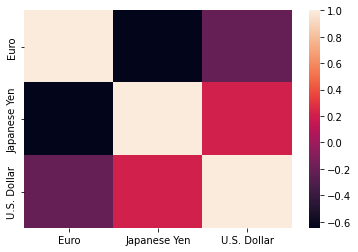

In [12]:
indian = currencies[['Euro', 'Japanese Yen', 'U.S. Dollar']]

import seaborn as sns
corr = indian.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

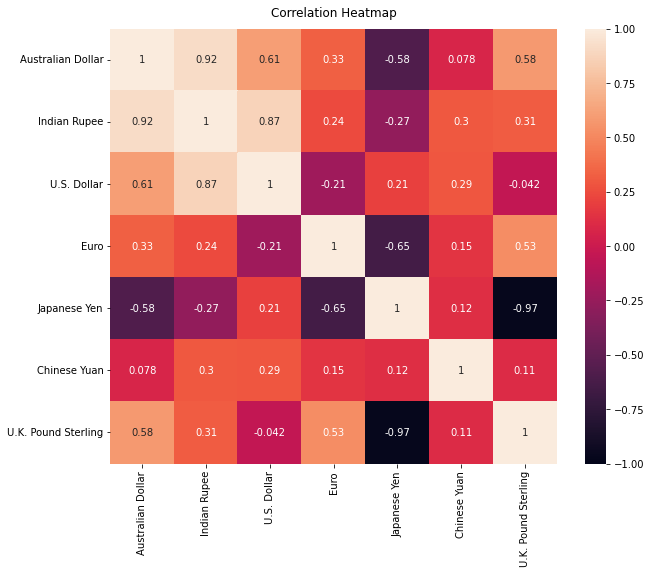

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt
corr = currencies[['Australian Dollar', 'Indian Rupee', 'U.S. Dollar', 'Euro', 'Japanese Yen', 'Chinese Yuan', 'U.K. Pound Sterling']].corr()
fig, ax = plt.subplots(figsize=(10, 8))


# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

heatmap = sns.heatmap(corr,  vmin=-1, vmax=1, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

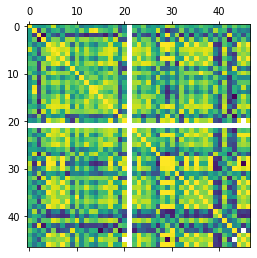

In [8]:
import matplotlib.pyplot as plt

plt.matshow(currencies.corr())
plt.show()

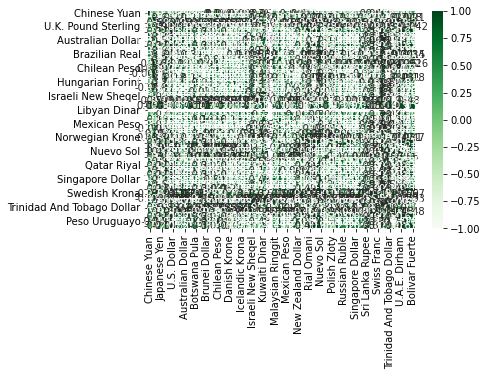

In [7]:
import seaborn as sns
 
sns.heatmap(currencies.corr(method='pearson'), annot=True, cmap='Greens')

In [41]:
nas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/nas.csv')
nas.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [47]:
nas = nas[['Mother.occupation', 'Siblings']]
nas.groupby('Siblings').agg({'Siblings':'count'})



,Siblings
Siblings,
1 sibling,2726
2 siblings,2979
3 siblings,1526
4+ siblings,1167
Single child,403


In [31]:
nas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8801 entries, 0 to 8800
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STUID                   8801 non-null   int64  
 1   State                   8801 non-null   object 
 2   District                8801 non-null   int64  
 3   Gender                  8799 non-null   object 
 4   Age                     8569 non-null   object 
 5   Category                8232 non-null   float64
 6   Same.language           8572 non-null   float64
 7   Siblings                8801 non-null   object 
 8   Handicap                8304 non-null   object 
 9   Father.edu              8147 non-null   object 
 10  Mother.edu              7950 non-null   object 
 11  Father.occupation       7761 non-null   object 
 12  Mother.occupation       6626 non-null   object 
 13  Below.poverty           7347 non-null   object 
 14  Use.calculator          6646 non-null   

In [48]:
nas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/nas.csv')
nas.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [59]:
father.describe()

,Science..
count,4144.000000
mean,36.313272
std,13.199105
min,0.000000
25%,27.270000
50%,34.550000
75%,43.640000
max,85.450000


In [58]:
father = nas[['Science..', 'Father.edu','Age']]
father = father[father['Age'] != '11 years']

father.groupby(['Father.edu', 'Age']).agg({'Science..':'mean'})

Science..
Father.edu     Age                 
Degree & above 12 years   46.752857
               13 years   44.805143
               14 years   42.676944
               15 years   29.090000
               16+ years  32.730000
Illiterate     11- years        NaN
               12 years   29.870000
               13 years   33.758968
               14 years   35.319478
               15 years   33.413333
               16+ years  33.116786
Primary        11- years  48.486667
               12 years   34.121667
               13 years   37.617555
               14 years   36.700267
               15 years   35.162768
               16+ years  32.364000
Secondary      11- years  29.696667
               12 years   33.593810
               13 years   38.164402
               14 years   36.738859
               15 years   32.872800
               16+ years  30.960000
Sr secondary   11- years        NaN
               12 years   40.113750
               13 years   39.046503
               14 years   39.050278
               15 years   38.615714
               16+ years  31.513333

In [3]:
def calculateMean(x):
  return float(x['rating'] + x['food_rating'] + x['service_rating'])/ 3

In [9]:
import pandas as pd
cust_rating = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/GvOkzy5MLdy9zJ8vXMArwpRvN/rating_final.csv')

# cust_rating['avg_rating'] = round(cust_rating['avg_rating'].mean())
cust_rating['avg_rating'] = (cust_rating['rating'] + cust_rating['food_rating'] + cust_rating['service_rating'])/ 3
# print(cust_rating.head(10))
cust_rating.head()

,userID,placeID,rating,food_rating,service_rating,avg_rating
0,U1077,135085,2,2,2,2.000000
1,U1077,135038,2,2,1,1.666667
2,U1077,132825,2,2,2,2.000000
3,U1077,135060,1,2,2,1.666667
4,U1068,135104,1,1,2,1.333333
